In [6]:
import os
import re
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
import skimage
import skimage.io
import skimage.color
import skimage.transform
import skimage.feature

In [7]:
skimage.__version__

'0.20.0'

Loading Data

In [8]:
data = pickle.load(open('animal_image_data.pkl','rb'))
data

{'data': array([[[[196, 214, 188],
          [196, 214, 188],
          [196, 215, 187],
          ...,
          [ 81,  76,  80],
          [ 81,  76,  80],
          [ 69,  64,  68]],
 
         [[196, 214, 188],
          [196, 214, 188],
          [196, 215, 187],
          ...,
          [ 82,  77,  81],
          [ 83,  78,  82],
          [ 77,  72,  76]],
 
         [[193, 213, 185],
          [194, 214, 186],
          [194, 214, 186],
          ...,
          [ 82,  77,  81],
          [ 82,  76,  80],
          [ 79,  73,  77]],
 
         ...,
 
         [[254, 254, 254],
          [254, 254, 254],
          [254, 254, 254],
          ...,
          [ 70,  65,  69],
          [ 65,  60,  66],
          [ 62,  57,  63]],
 
         [[254, 254, 254],
          [254, 254, 254],
          [254, 254, 254],
          ...,
          [ 66,  61,  65],
          [ 62,  57,  63],
          [ 64,  59,  65]],
 
         [[254, 254, 254],
          [254, 254, 254],
          [254, 254, 2

Split into train and test

In [9]:
x = data['data']
y = data['target']

In [10]:
x

array([[[[196, 214, 188],
         [196, 214, 188],
         [196, 215, 187],
         ...,
         [ 81,  76,  80],
         [ 81,  76,  80],
         [ 69,  64,  68]],

        [[196, 214, 188],
         [196, 214, 188],
         [196, 215, 187],
         ...,
         [ 82,  77,  81],
         [ 83,  78,  82],
         [ 77,  72,  76]],

        [[193, 213, 185],
         [194, 214, 186],
         [194, 214, 186],
         ...,
         [ 82,  77,  81],
         [ 82,  76,  80],
         [ 79,  73,  77]],

        ...,

        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [ 70,  65,  69],
         [ 65,  60,  66],
         [ 62,  57,  63]],

        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [ 66,  61,  65],
         [ 62,  57,  63],
         [ 64,  59,  65]],

        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [ 56,  51,  55],
        

In [11]:
y

['bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'bear',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'c

Splitting with Train Test Split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify = y)

In [13]:
x_train.shape,x_test.shape,len(y_train),len(y_test)

((1542, 80, 80, 3), (515, 80, 80, 3), 1542, 515)

# Feature Extraction using HOG

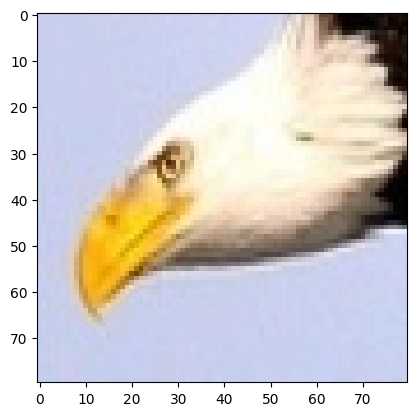

In [16]:
img = skimage.io.imread('eagle.jpg')
plt.imshow(img)

In [40]:
img_re = skimage.transform.rescale(img , 1/3)
greysc = skimage.color.rgb2gray(img)
feature_vector , hog_img = skimage.feature.hog(greysc,orientations=9,pixels_per_cell=(12,12),cells_per_block=(2,2),visualize=True)

In [41]:
len(feature_vector)

900

In [42]:
greysc.shape

(80, 80)

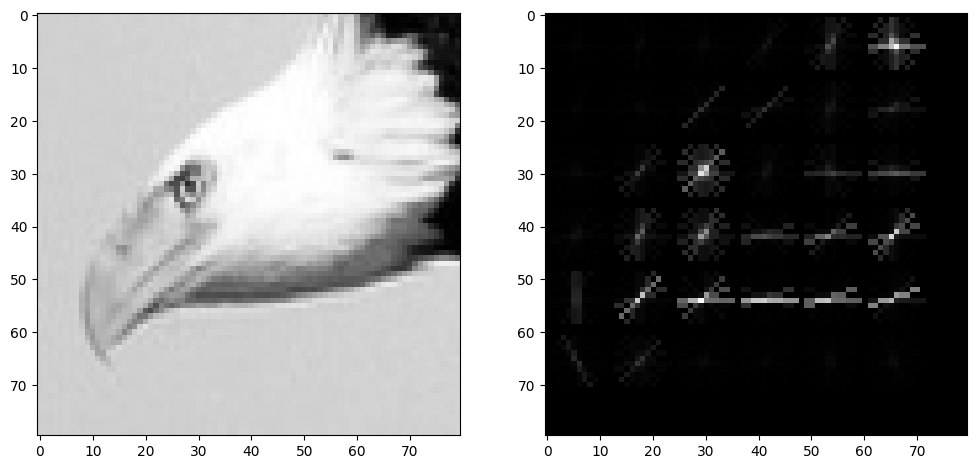

In [43]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(greysc,cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(hog_img,cmap = 'gray')

# Conversion
- to grayscale
- HOG transformer

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

In [90]:
class convertrgb2gray(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,x,y=None):
        return self
    def transform(self,x,y=None):
        return np.array([skimage.color.rgb2gray(img) for img in x])
    
#     class convertrgb2gray(BaseEstimator,TransformerMixin):
#     def __init__(self):
#         pass
#     def fit(self,x,y=None):
#         return x
#     def transform(self,x,y=None):
#         return np.array([skimage.color.rgb2gray(img) for img in x])

In [52]:
x_train.shape

(1542, 80, 80, 3)

In [53]:
mytransformer = convertrgb2gray() 
x_train_gray = mytransformer.fit_transform(x_train)

In [55]:
x_train_gray.shape

(1542, 80, 80)

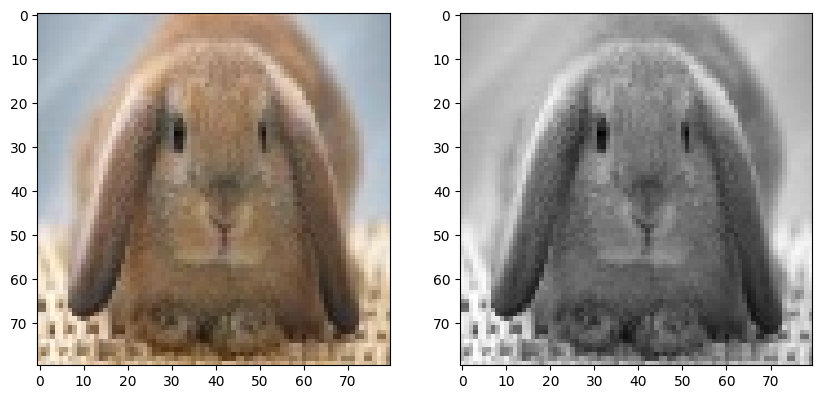

In [57]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(x_train[35])
plt.subplot(1,2,2)
plt.imshow(x_train_gray[35],cmap='gray')

# Next 3 cells are just for visualizing

In [62]:
class hogtransformer(BaseEstimator,TransformerMixin):
    import skimage.feature
    def __init__(self,orientations=9,pixels_per_cell=(8,8),cells_per_block=(3,3)):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        
    def fit(self,x,y=None):
        return self
    
    def transform(self,x,y=None):
        def temp_hog(img):
            hog_features,hog_img = skimage.feature.hog(img,orientations=self.orientations,
                                pixels_per_cell=self.pixels_per_cell,
                                cells_per_block=self.cells_per_block,visualize=True)
            return hog_features,hog_img
        hogfeatures = np.array([temp_hog(img)[0] for img in x])
        hogimgs = np.array([temp_hog(img)[1] for img in x])
        return hogimgs

In [63]:
myhogtransformer = hogtransformer()
x_train_hog = myhogtransformer.fit_transform(x_train_gray)

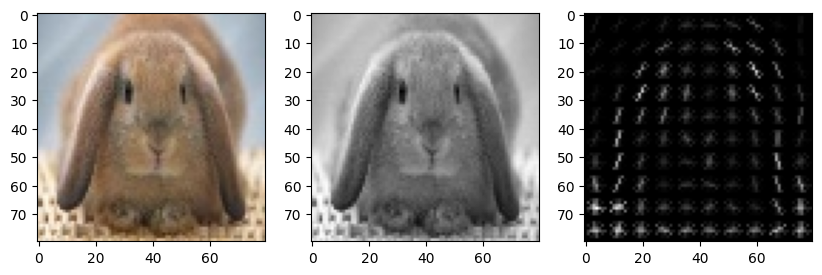

In [64]:
plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
plt.imshow(x_train[35])
plt.subplot(1,3,2)
plt.imshow(x_train_gray[35],cmap='gray')
plt.subplot(1,3,3)
plt.imshow(x_train_hog[35],cmap='gray')

# Back to Main Code

In [65]:
class hogtransformer(BaseEstimator,TransformerMixin):
    import skimage.feature
    def __init__(self,orientations=9,pixels_per_cell=(8,8),cells_per_block=(3,3)):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        
    def fit(self,x,y=None):
        return self
    
    def transform(self,x,y=None):
        def temp_hog(img):
            hog_features = skimage.feature.hog(img,orientations=self.orientations,
                                pixels_per_cell=self.pixels_per_cell,
                                cells_per_block=self.cells_per_block)
            return hog_features
        return np.array([temp_hog(img) for img in x])

In [138]:
x_train_gray.shape

(1542, 80, 80)

In [66]:
myhogtransformer = hogtransformer()
x_train_hog = myhogtransformer.fit_transform(x_train_gray)

# Training Model using Stochastic Gradient Descent 

can also use Logistic Regression, K Nearest Neighbour, Support Vector Machine

In [71]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV #GridSearchCV helps with Hyperparameter Tuning
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

In [72]:
sgd = SGDClassifier(loss='hinge',learning_rate='adaptive',
                    early_stopping=True,eta0=0.2)

Pipeline formation
- Step 1: Convert to Grayscale
- Step 2: Extract Features
- Step 3: Normalize
- Step 4: Machine Training

In [79]:
rgbtogray_t = convertrgb2gray()
hog_t = hogtransformer()
scale_t = StandardScaler()

### Full Pipeline

In [80]:
#Step 1: Convert to Grayscale
x_train_gray = rgbtogray_t.fit_transform(x_train)

#Step 2: Extract Features
x_train_hog = hog_t.fit_transform(x_train_gray)

#Step 3: Normalize
x_train_scale = scale_t.fit_transform(x_train_hog)

#Step 4: Machine Training
sgd.fit(x_train_scale,y_train)

SGDClassifier(early_stopping=True, eta0=0.2, learning_rate='adaptive')

Repeat pipeline for test

In [81]:
#Step 1: Convert to Grayscale
x_test_gray = rgbtogray_t.fit_transform(x_test)

#Step 2: Extract Features
x_test_hog = hog_t.fit_transform(x_test_gray)

#Step 3: Normalize
x_test_scale = scale_t.fit_transform(x_test_hog)

#Step 4: Machine Training
y_pred_test = sgd.predict(x_test_scale)

In [82]:
y_pred_test

array(['bear', 'bear', 'panda', 'cat', 'chicken', 'chicken', 'dog',
       'chicken', 'wolf', 'cow', 'cow', 'sheep', 'human', 'deer',
       'pigeon', 'tiger', 'monkey', 'duck', 'chicken', 'cat', 'monkey',
       'eagle', 'wolf', 'human', 'eagle', 'lion', 'human', 'tiger', 'dog',
       'elephant', 'eagle', 'cat', 'chicken', 'human', 'elephant',
       'chicken', 'mouse', 'dog', 'monkey', 'eagle', 'pigeon', 'duck',
       'wolf', 'cat', 'sheep', 'cow', 'monkey', 'dog', 'dog', 'sheep',
       'pigeon', 'deer', 'pigeon', 'panda', 'dog', 'chicken', 'panda',
       'eagle', 'eagle', 'bear', 'cat', 'elephant', 'cat', 'eagle',
       'bear', 'dog', 'human', 'human', 'cat', 'chicken', 'chicken',
       'chicken', 'wolf', 'pigeon', 'sheep', 'monkey', 'pigeon', 'cow',
       'sheep', 'cat', 'monkey', 'wolf', 'bear', 'pigeon', 'mouse',
       'elephant', 'duck', 'cat', 'cow', 'sheep', 'dog', 'mouse', 'deer',
       'cat', 'cat', 'dog', 'dog', 'pigeon', 'duck', 'bear', 'human',
       'chicken', 

## Model Evaluation

In [84]:
cr = sklearn.metrics.classification_report(y_test,y_pred_test,output_dict=True)
pd.DataFrame(cr).T #.T Transforms it

,precision,recall,f1-score,support
bear,0.363636,0.320000,0.340426,25.00000
cat,0.673913,0.775000,0.720930,40.00000
chicken,0.566667,0.680000,0.618182,25.00000
cow,0.578947,0.423077,0.488889,26.00000
deer,0.687500,0.846154,0.758621,26.00000
dog,0.394737,0.454545,0.422535,33.00000
duck,0.727273,0.615385,0.666667,26.00000
eagle,0.531250,0.680000,0.596491,25.00000
elephant,0.571429,0.480000,0.521739,25.00000
human,0.705882,0.960000,0.813559,25.00000


For Cohen Kappa Score - 
- 0.5 < Score - Good Model
- 0.8 < Score - Excellent Model

In [86]:
metrics.cohen_kappa_score(y_test,y_pred_test)

0.5649211175446216

# Pipeline Model

does what we did above but in one shot

In [87]:
from sklearn.pipeline import Pipeline

In [107]:
model_pipe = Pipeline([
    ('grayscale',convertrgb2gray()),
    ('hogtransform',hogtransformer(orientations=9,pixels_per_cell=(10,10),cells_per_block=(3,3))),
    ('scaler',StandardScaler()),
    ('sgd',SGDClassifier(loss='hinge',learning_rate='adaptive',
                         early_stopping=True,eta0=0.2))
])

In [108]:
model_pipe.fit(x_train,y_train)

Pipeline(steps=[('grayscale', convertrgb2gray()),
                ('hogtransform', hogtransformer(pixels_per_cell=(10, 10))),
                ('scaler', StandardScaler()),
                ('sgd',
                 SGDClassifier(early_stopping=True, eta0=0.2,
                               learning_rate='adaptive'))])

In [109]:
y_pred_test = model_pipe.predict(x_test)

In [110]:
cr = pd.DataFrame(sklearn.metrics.classification_report(y_test,y_pred_test,output_dict=True)).T
cr

,precision,recall,f1-score,support
bear,0.615385,0.640000,0.627451,25.000000
cat,0.604651,0.650000,0.626506,40.000000
chicken,0.684211,0.520000,0.590909,25.000000
cow,0.470588,0.615385,0.533333,26.000000
deer,0.656250,0.807692,0.724138,26.000000
dog,0.440000,0.333333,0.379310,33.000000
duck,0.800000,0.615385,0.695652,26.000000
eagle,0.619048,0.520000,0.565217,25.000000
elephant,0.761905,0.640000,0.695652,25.000000
human,0.774194,0.960000,0.857143,25.000000


In [111]:
metrics.cohen_kappa_score(y_test,y_pred_test)

0.5918867150633762

## Grid Search
- Hyperparameter Tuning

In [98]:
from sklearn.model_selection import GridSearchCV

In [112]:
estimator = Pipeline([
    ('grayscale',convertrgb2gray()),
    ('hogtransform',hogtransformer()),
    ('scaler',StandardScaler()),
    ('sgd',SGDClassifier())
])

In [116]:
param_grid = [
    {
        'hogtransform__orientations' : [7,8,9,10,11,12],
        'hogtransform__pixels_per_cell' : [(7,7),(8,8),(9,9),(10,10)],
        'hogtransform__cells_per_block' : [(2,2),(3,3)],
        'sgd__loss' : ['hinge','squared_hinge','perceptron'],
        'sgd__learning_rate' : ['optimal']
    },
    {
        'hogtransform__orientations' : [7,8,9,10,11,12],
        'hogtransform__pixels_per_cell' : [(7,7),(8,8),(9,9),(10,10)],
        'hogtransform__cells_per_block' : [(2,2),(3,3)],
        'sgd__loss' : ['hinge','squared_hinge','perceptron'],
        'sgd__learning_rate' : ['adaptive'],
        'sgd__eta0' : [0.001,0.01]
    }
]

In [117]:
model_grid = GridSearchCV(estimator,param_grid=param_grid,
                         scoring='accuracy',n_jobs=1,
                          cv=3,verbose=2)

In [118]:
model_grid.fit(x_train,y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   8.7s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   8.5s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   9.2s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   8.7s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   6.9s
[CV] END hogtransform__ce

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   6.9s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   6.7s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   7.2s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   6.8s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   6.5s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   5.4s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   5.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   4.9s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   4.9s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   4.8s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(10, 10), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   5.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(10, 10), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   5.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(10, 10), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   5.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(10, 10), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   5.2s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(10, 10), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   5.3s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=12, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   9.2s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=12, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   7.2s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=12, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   7.2s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=12, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   7.7s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=12, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   7.9s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=12, hogtra

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   5.5s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   5.5s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   5.5s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   5.5s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   5.7s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   3.9s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   3.8s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   3.9s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   4.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   4.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(10, 10), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   5.2s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(10, 10), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   5.7s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(10, 10), sgd__learning_rate=optimal, sgd__loss=hinge; total time=   5.5s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(10, 10), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   5.9s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(10, 10), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=   5.5s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, ho

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=11, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  12.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=11, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  11.6s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=11, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  11.6s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=11, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=  12.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=11, hogtransform__pixels_per_cell=(7, 7), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=  15.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=11, hogtra

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=12, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  11.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=12, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  12.2s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=12, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=hinge; total time=  11.3s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=12, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=  13.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=12, hogtransform__pixels_per_cell=(8, 8), sgd__learning_rate=optimal, sgd__loss=squared_hinge; total time=  12.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=12, hogtra

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  19.3s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  15.5s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  11.6s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  10.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  10.4s
[CV] EN

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   5.5s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   5.8s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   5.8s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   6.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=7, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=pe

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  11.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  11.7s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  10.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  10.2s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   9.1s
[CV] E

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   5.6s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   5.8s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   5.7s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   5.6s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=8, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   5.8s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   5.6s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   5.5s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   5.3s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=9, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   5.3s

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   9.8s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  10.5s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  10.6s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  10.5s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total t

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   6.5s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   6.3s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   6.3s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   6.4s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=11, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  12.3s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=11, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  12.6s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=11, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  12.3s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=11, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   9.5s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=11, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   9.6

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=11, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   6.4s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=11, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   5.6s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=11, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   5.5s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=11, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   5.4s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=11, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=pe

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=12, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   9.9s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=12, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  10.0s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=12, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  11.3s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=12, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  11.2s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=12, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  11.1s
[CV

[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=12, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   7.3s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=12, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   7.2s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=12, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   7.3s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=12, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   7.1s
[CV] END hogtransform__cells_per_block=(2, 2), hogtransform__orientations=12, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=pe

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  10.9s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   6.5s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   6.5s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   6.2s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=7, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   4.8s
[CV

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  13.3s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  13.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  13.6s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  14.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; tot

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   7.2s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   7.6s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   7.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   7.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   7.2s
[CV]

C:\Users\Dhruv J\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:704: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  13.7s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   6.4s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   6.2s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   6.6s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=8, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; to

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  13.2s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  13.2s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  13.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  13.2s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  13

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   7.6s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   7.7s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=9, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   7.8s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  16.7s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  1

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=   7.9s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   7.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   7.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   6.9s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=10, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=11, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  18.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=11, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  18.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=11, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  20.2s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=11, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  20.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=11, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  20.1s
[CV

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=11, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   9.0s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=11, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   8.9s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=11, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   9.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=11, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   9.1s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=11, hogtransform__pixels_per_cell=(9, 9), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; 

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=12, hogtransform__pixels_per_cell=(7, 7), sgd__eta0=0.01, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=  21.4s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=12, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  15.7s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=12, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  15.6s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=12, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=hinge; total time=  15.5s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=12, hogtransform__pixels_per_cell=(8, 8), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=  14.9

[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=12, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   8.3s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=12, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=squared_hinge; total time=   8.3s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=12, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   8.8s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=12, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=perceptron; total time=   8.7s
[CV] END hogtransform__cells_per_block=(3, 3), hogtransform__orientations=12, hogtransform__pixels_per_cell=(10, 10), sgd__eta0=0.001, sgd__learning_rate=adaptive, sgd__loss=

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('grayscale', convertrgb2gray()),
                                       ('hogtransform', hogtransformer()),
                                       ('scaler', StandardScaler()),
                                       ('sgd', SGDClassifier())]),
             n_jobs=1,
             param_grid=[{'hogtransform__cells_per_block': [(2, 2), (3, 3)],
                          'hogtransform__orientations': [7, 8, 9, 10, 11, 12],
                          'hogtransform__pixels_per_cell': [(7, 7), (8, 8),
                                                            (9, 9), (10, 10)],
                          'sgd__learni...l'],
                          'sgd__loss': ['hinge', 'squared_hinge',
                                        'perceptron']},
                         {'hogtransform__cells_per_block': [(2, 2), (3, 3)],
                          'hogtransform__orientations': [7, 8, 9, 10, 11, 12],
                          'hogtransform__pixels_per_cell': [(7, 7), (8, 8),
                                                            (9, 9), (10, 10)],
                          'sgd__eta0': [0.001, 0.01],
                          'sgd__learning_rate': ['adaptive'],
                          'sgd__loss': ['hinge', 'squared_hinge',
                                        'perceptron']}],
             scoring='accuracy', verbose=2)

In [119]:
model_grid.best_params_

{'hogtransform__cells_per_block': (2, 2),
 'hogtransform__orientations': 11,
 'hogtransform__pixels_per_cell': (10, 10),
 'sgd__learning_rate': 'optimal',
 'sgd__loss': 'hinge'}

In [120]:
model_grid.best_score_

0.7269779507133594

In [121]:
best_model = model_grid.best_estimator_
best_model

Pipeline(steps=[('grayscale', convertrgb2gray()),
                ('hogtransform',
                 hogtransformer(cells_per_block=(2, 2), orientations=11,
                                pixels_per_cell=(10, 10))),
                ('scaler', StandardScaler()), ('sgd', SGDClassifier())])

In [122]:
y_pred = best_model.predict(x_test)

In [123]:
cr = pd.DataFrame(sklearn.metrics.classification_report(y_test,y_pred,output_dict=True)).T
cr

C:\Users\Dhruv J\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dhruv J\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dhruv J\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

,precision,recall,f1-score,support
bear,0.777778,0.840000,0.807692,25.000000
cat,0.727273,0.800000,0.761905,40.000000
chicken,0.954545,0.840000,0.893617,25.000000
cow,0.558824,0.730769,0.633333,26.000000
deer,0.869565,0.769231,0.816327,26.000000
dog,0.645161,0.606061,0.625000,33.000000
duck,0.909091,0.769231,0.833333,26.000000
eagle,0.766667,0.920000,0.836364,25.000000
elephant,0.833333,0.800000,0.816327,25.000000
human,0.862069,1.000000,0.925926,25.000000


In [124]:
metrics.cohen_kappa_score(y_test,y_pred)

0.7476355146888919

In [125]:
pickle.dump(best_model,open('best_model.pkl','wb'))

In [126]:
model_grid.best_params_

{'hogtransform__cells_per_block': (2, 2),
 'hogtransform__orientations': 11,
 'hogtransform__pixels_per_cell': (10, 10),
 'sgd__learning_rate': 'optimal',
 'sgd__loss': 'hinge'}

# E2E Pipeline

In [127]:
from sklearn.pipeline import make_pipeline

In [128]:
pipe1 = make_pipeline(convertrgb2gray(),
                      hogtransformer(orientations=11,pixels_per_cell=(10,10),cells_per_block=(2,2)))

In [129]:
feature_vector = pipe1.fit_transform(x_train)

Standard Scaler

In [130]:
stdsc = StandardScaler()
transformed_x_train = stdsc.fit_transform(feature_vector)

In [131]:
newmodel = SGDClassifier(learning_rate='optimal',loss='hinge',alpha=0.1,early_stopping=True)

In [132]:
newmodel.fit(transformed_x_train,y_train)

SGDClassifier(alpha=0.1, early_stopping=True)

Evaluate Data

In [134]:
feature_vector_test = pipe1.fit_transform(x_test)
transformed_x_test = stdsc.fit_transform(feature_vector_test)
y_pred_test = newmodel.predict(transformed_x_test)

In [135]:
cr = pd.DataFrame(sklearn.metrics.classification_report(y_test,y_pred,output_dict=True)).T
cr

C:\Users\Dhruv J\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dhruv J\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dhruv J\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

,precision,recall,f1-score,support
bear,0.777778,0.840000,0.807692,25.000000
cat,0.727273,0.800000,0.761905,40.000000
chicken,0.954545,0.840000,0.893617,25.000000
cow,0.558824,0.730769,0.633333,26.000000
deer,0.869565,0.769231,0.816327,26.000000
dog,0.645161,0.606061,0.625000,33.000000
duck,0.909091,0.769231,0.833333,26.000000
eagle,0.766667,0.920000,0.836364,25.000000
elephant,0.833333,0.800000,0.816327,25.000000
human,0.862069,1.000000,0.925926,25.000000


In [136]:
#save model
pickle.dump(newmodel,open('Image_Classification_SGD.pkl','wb'))

In [137]:
pickle.dump(stdsc,open('Scalar.pkl','wb'))